## Introduction to Scikit-Learn (sklearn) 

## 0. An end-toend Scikit-Learn     workflow

In [1]:
import numpy as np
import pandas as pd
heart_disease= pd.read_csv('heart-disease.csv')
heart_disease

FileNotFoundError: [Errno 2] No such file or directory: 'heart-disease.csv'

In [ ]:
## Create X (features matrix)
X=heart_disease.drop('target', axis=1)# this means that all colums belong to X except target column

## Create Y (labels)

Y=heart_disease['target']

In [ ]:
# Choose a right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

# we will keep the default hyperparameters
clf.get_params()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2)

clf.fit(X_train, Y_train);

In [ ]:
X_test

In [ ]:
# 3. Make predictions
y_pred=clf.predict(X_test)
y_pred

In [ ]:
Y_test

In [ ]:
clf.score(X_train, Y_train)

In [ ]:
clf.score(X_test, Y_test)

In [ ]:
## 4. evaluating the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(Y_test, y_pred))

In [ ]:
print(confusion_matrix(Y_test, y_pred))

In [ ]:
print(accuracy_score(Y_test, y_pred))

In [ ]:
## 5. Improve a model
## Try different amount of n_estimates


In [ ]:
np.random.seed(42)
for i in range(10, 100, 10):
    print(f'Trying model with {i} estimators')
    clf= RandomForestClassifier(n_estimators=i).fit(X_train, Y_train)
    print(f'model accuracy on test data: {clf.score(X_test, Y_test)*100:.2f}%')
    print(' ')

In [ ]:
## 6. Save the model and load it
import pickle
pickle.dump(clf, open('random_forest_model_1.pkl', 'wb'))


In [ ]:
np.random.seed(0)
my_data=np.random.randn(303, 14)
my_data

In [ ]:
baks=pd.DataFrame(my_data, columns=['pa', 'ba', 'ca', 'da', 'ea', 'ra', 'ta', 'fa', 'va', 'ga', 'bb', 'ab', 'cb','db'])
baks

In [ ]:
x=baks.drop('pa', axis=1)
y=baks['pa']

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)
#clf.fit(x_train, y_train)

In [ ]:
## 7. To reload back the model
loaded_model=pickle.load(open('random_forest_model_1.pkl', 'rb'))
loaded_model.score(X_test, Y_test)

In [ ]:
x_test

## 1. Getting our data ready to be used with machine learning
There are three main things we have to do:

    1. Split the data into features and labels (  usually "X" and "Y")
    2. Filling (also called importing) or disgarding missing values
    3. Converting non.numerical values to numerical values (also called feature encoding)
    

In [2]:
heart_disease.head()

NameError: name 'heart_disease' is not defined

In [3]:
x=heart_disease.drop('target', axis=1)
y=heart_disease['target']

NameError: name 'heart_disease' is not defined

In [4]:
# 1. split the data into training and test sets
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)

NameError: name 'x' is not defined

In [ ]:
x.head()

In [ ]:
y.head()

In [ ]:
x_train.shape, x_train.shape, y_train.shape, y_test.shape

## 1.1 making all our data all numerical values



In [ ]:
car_sales=pd.read_csv('data/car-sales-extended.csv')
car_sales

In [ ]:
car_sales.dtypes

In [ ]:
# Split our data into x and y
x=car_sales.drop('Price', axis=1)
y=car_sales['Price']

In [ ]:
# Split our data into training and testing data
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)


In [ ]:
# Converting our non-numerical values to numerical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot= OneHotEncoder()
transformer= ColumnTransformer([('one_hot', one_hot,
                                categorical_features)],
                              remainder='passthrough')
transformed_x= transformer.fit_transform(x)
transformed_x

In [ ]:
pd.DataFrame(transformed_x)

In [ ]:
dummies=pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

In [ ]:
# Now that we convert all our non-numerical values to numerical values 
# Lets Split our data again into training and testing data
np.random.seed(42)
x_train, x_test, y_train, y_test=train_test_split(transformed_x, y, test_size=0.2)


In [ ]:
# Lets Build our machine Learning model
#Then lets fit the trained data into our model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

## 1.2 What if there are missing values in our dataset?
     1. fill them with some values (also known as imputation)
OR
     2. Remove the samples with missing data altogether
 

In [ ]:
# Import car sales missing data csv file
car_sales_missing=pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing

In [ ]:
car_sales_missing.isnull().sum()

In [ ]:
# lets create X and Y
x=car_sales_missing.drop('Price', axis=1)
y=car_sales_missing['Price']

In [ ]:
# lets convert our non-numericals to numericals
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot= OneHotEncoder()
transformer= ColumnTransformer([('one_hot', one_hot,
                                categorical_features)],
                              remainder='passthrough')
transformed_x= transformer.fit_transform(x)
transformed_x

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(dummies, y, test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train, y_train)

we got an error while trying to convert non-numerical to numerical
Now we have two options;
### Option 1: Fill missing data with panda

In [ ]:
# Fill the "Make" column
car_sales_missing['Make'].fillna('missing', inplace=True)
# Fill the "Colour" column
car_sales_missing['Colour'].fillna('missing', inplace=True)
# Fill the "Odometer (KM)" column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)
# Fill the "Doors" column
car_sales_missing['Doors'].fillna(4, inplace=True)
#car_sales_missing['Price'].fillna(car_sales_missing['Price'].mean(), inplace=True)



In [5]:
# Rechecking our data
car_sales_missing.isna().sum()

NameError: name 'car_sales_missing' is not defined

In [6]:
len(car_sales_missing)

NameError: name 'car_sales_missing' is not defined

In [7]:
# Remove rows with missing Price values
car_sales_missing.dropna(inplace=True)

NameError: name 'car_sales_missing' is not defined

In [8]:
car_sales_missing.isnull().sum()

NameError: name 'car_sales_missing' is not defined

In [9]:
# lets convert our non-numericals to numericals
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot= OneHotEncoder()
transformer= ColumnTransformer([('one_hot', one_hot,
                                categorical_features)],
                              remainder='passthrough')
transformed_x= transformer.fit_transform(x)
transformed_x

NameError: name 'x' is not defined

In [10]:
# Since we fill and remove all the missing values,
# we need to recreate our x and y values
x=car_sales_missing.drop('Price', axis=1)
y=car_sales_missing['Price']

NameError: name 'car_sales_missing' is not defined

In [11]:
# Now we can go on to convert our non-numericals to numericals
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot= OneHotEncoder()
transformer= ColumnTransformer([('one_hot', one_hot,
                                categorical_features)],
                              remainder='passthrough')
transformed_x= transformer.fit_transform(car_sales_missing)
transformed_x

NameError: name 'car_sales_missing' is not defined

### Option 2: Fill missing values with scikit-learn

In [12]:
x_train, x_test, y_train, y_test=train_test_split(transformed_x, y,
                                                 test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

NameError: name 'transformed_x' is not defined

In [13]:
car_sales_missing=pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [14]:
car_sales_missing.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [15]:
# Drop the row with no label or with missing values
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isnull().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [16]:
# Split the data into x and y
x=car_sales_missing.drop('Price', axis=1)
y=car_sales_missing['Price']

In [17]:
# now we need to fill the missing data using scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Filling the categorical values with missing and numerical values with mean
categorical_imputer=SimpleImputer(strategy='constant', fill_value='missing')
door_imputer=SimpleImputer(strategy='constant', fill_value=4)
numerical_imputer=SimpleImputer(strategy='mean')

# Define the columns
categorical_features=['Make', 'Colour']
door_feature=['Doors']
numerical_features=['Odometer (KM)']

# create an imputer (something that fills missing data)
imputer=ColumnTransformer([
    ('categorical_imputer', categorical_imputer, categorical_features),
('door_imputer', door_imputer, door_feature),
('numerical_imputer', numerical_imputer, numerical_features)])

# Transform the data (x data)
filled_x=imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [18]:
car_sales_filled=pd.DataFrame(filled_x, columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [19]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [20]:
# lets convert our non-numericals to numericals
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot= OneHotEncoder()
transformer= ColumnTransformer([('one_hot', one_hot,
                                categorical_features)],
                              remainder='passthrough')
transformed_x= transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [21]:
# Now we've got pour data as numerical and also we've filled all the missing values
# Then let's split our data into training and test sets 
#and fit the model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(transformed_x, y, 
                                                  test_size=0.2 ) 
model=RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.21990196728583944

In [22]:
len(car_sales_filled), len(car_sales)

NameError: name 'car_sales' is not defined

## 2. Choosing the right estimator/model/algorithm for your problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm

* Classification that is prediction whether a sample is one thing or another
* Reggression- that is predicting a number

* To choose the right model for a specific problem, we need to check the machine-learning map.....https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


## 2.1 Picking a machine learning model for a regression problem

In [23]:
# Import Boston housing dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
boston=load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [24]:
# The boston dataset is in a dictionary format, we need to change it to data frame
boston_df=pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target']=pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
# Let's try the Ridge Reggression model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Let's setup a random seed
np.random.seed(42)

# Let's create a dataset
x=boston_df.drop('target', axis=1)
y=boston_df['target']


In [26]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [27]:
# split into train and test set
x_train, x_test, y_train, y_test=train_test_split(x, y,
                                                 test_size=0.2)
# let's instantiate Ridge model
model=Ridge()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6662221670168519

How do we improve the score

What if Ridge wasn't walking?

Let's refer back to the ML map....https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html 

`

In [28]:
# let's try Random Forest Reggressor
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x=boston_df.drop('target', axis=1)
y=boston_df['target']
x_train, x_test, y_train, y_test=train_test_split(x,y, 
                                                  test_size=0.2)
model_1=RandomForestRegressor()
model_1.fit(x_train, y_train)
model_1.score(x_test, y_test)


0.8654448653350507

## 2.2 Choosing an estimator/model/algorithm for a classification 

* let's go to the ML map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [29]:
heart_disease=pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [31]:
len(heart_disease)

303

In [32]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Note: 
    1. If you have structured data, use ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning method

In [33]:
from sklearn.svm import LinearSVC
np.random.seed(42)
x=heart_disease.drop('target', axis=1)
y=heart_disease['target']
x_train, x_test, y_train, y_test=train_test_split(x, y,
                                                 test_size=0.2)
model=LinearSVC(max_iter=10000)
model.fit(x_train, y_train)
model.score(x_test, y_test)

C:\Users\Raddy\desktop\ML\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [34]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [35]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart_disease.drop('target', axis=1)
y=heart_disease['target']
x_train,x_test, y_train, y_test=train_test_split(x,y,
                                                test_size=0.2)
model=RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test, y_test)

0.8524590163934426

## 3. Fit the model/algorithm on our data and use it to make predictions


### 3.1 Fitting the model to the data

Different names for:

* 'x' = features, feature, variables, data
* 'y' = labels, tagerts, tagetvariables


In [36]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart_disease.drop('target', axis=1)
y=heart_disease['target']

x_train, x_test, y_train, y_test=train_test_split(x,y,
                                                 test_size=0.2)
model=RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test, y_test)

0.8524590163934426

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
 1. predict()
 2. predict_proba()

In [37]:
# used a trained model to make predictions
model.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [38]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [39]:
# Compare predictions to truth labels(y_test) to evaluate the model
y_preds =model.predict(x_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [40]:
# another way to test the accuracy of our trained model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Now make predictions with predic_proba()


In [41]:
# predict_proba() returns probabilities of a classification label
model.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [42]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
x=boston_df.drop('target', axis=1)
y=boston_df['target']
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                 test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test,y_test)


0.8654448653350507

In [44]:
y_preds=model.predict(x_test)
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [45]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [46]:
# Comparing the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

### 4. Evaluating Machine Learning Model

Three ways to evaluate Scikit-Learn model/algorithm/estimators
* 1. Estimator 'score' method
* 2. The scoring parameter
* 3. Problem-specific metric functions

##### 4.1 Estimator score method

In [47]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart_disease.drop('target', axis=1)
y=heart_disease['target']
x_train,x_test, y_train, y_test=train_test_split(x, y,
                                                test_size=0.2)
model=RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test, y_test)

0.8524590163934426

In [48]:
model.score(x_train, y_train)

1.0

In [49]:
model.score(x_test, y_test)

0.8524590163934426

Let's do the same but for Reggression

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
x=boston_df.drop('target', axis=1)
y=boston_df['target']
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                 test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8654448653350507

#### 4.2 Evaluating a model using the scoring parameter

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart_disease.drop('target', axis=1)
y=heart_disease['target']
x_train,x_test, y_train, y_test=train_test_split(x, y,
                                                test_size=0.2)
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
model.score(x_test, y_test)

0.8524590163934426

In [53]:
cross_val_score(model, x, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [54]:
np.random.seed(42)
# single training and test split score
model_single_score=model.score(x_test, y_test)

# Take the mean of 5-fold cross-validation score
model_cross_val_score=np.mean(cross_val_score(model, x, y))

# compare the two
model_single_score, model_cross_val_score

(0.8524590163934426, 0.8248087431693989)

#### 4.2.1 Classification Model evaluation metrics
* 1. Accuracy
* 2. Area under ROC curve
* 3. Confusion matrix
* 4. Classification report

###### 1. ACCURACY

In [55]:


from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

x=heart_disease.drop('target', axis=1)
y=heart_disease['target']

x_train, x_test, y_train, y_test= train_test_split(x,y, 
                                                  test_size=0.2)
model=RandomForestClassifier()
cross_val_score=cross_val_score(model, x, y)

In [56]:
np.mean(cross_val_score)

0.8215300546448088

In [57]:
print(f'Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%')

Heart Disease Classifier Cross-Validated Accuracy: 82.15%


##### 2. Area under the receiver operating characteristic (ROC) Curve or (AUC)

Two things to look at
* Area under curve (AUC)
* ROC curve

ROC vurves are a comparison of a model's true positive rate(tpr) versus a model's false positive rate(fpr)

* True positive=model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative= model predicts 0 when truth is 0
* False negative= model predicts 0 when truth is 1




In [58]:
x_train, x_test, y_train, y_test= train_test_split(x,y, 
                                                  test_size=0.2)

In [59]:
from sklearn.metrics import roc_curve
model.fit(x_train, y_train)
y_probs=model.predict_proba(x_test)
y_probs[:10]

array([[0.89, 0.11],
       [0.05, 0.95],
       [0.1 , 0.9 ],
       [0.79, 0.21],
       [0.09, 0.91],
       [0.02, 0.98],
       [0.76, 0.24],
       [0.19, 0.81],
       [0.62, 0.38],
       [0.99, 0.01]])

In [60]:
# The positive parameters
y_probs_positive=y_probs[:, 1]
y_probs_positive[:10]

array([0.11, 0.95, 0.9 , 0.21, 0.91, 0.98, 0.24, 0.81, 0.38, 0.01])

In [61]:
# calculating the TPR, FPR, and thresholds
tpr, fpr, thresholds=roc_curve(y_test, y_probs_positive)

# let's check the false positive rate
fpr[:10]

array([0.        , 0.02857143, 0.05714286, 0.14285714, 0.25714286,
       0.31428571, 0.34285714, 0.4       , 0.42857143, 0.42857143])

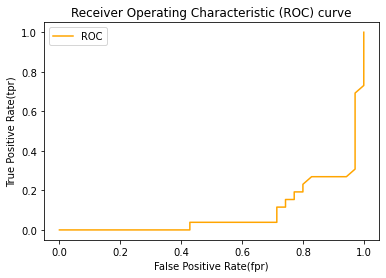

In [62]:
# Let create a ploting function for ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    ''' 
    Plot a ROC curve given false and true positive rates of a model
    ''' 
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange',label='ROC')
    
    # plot line with no predictive power (baseline)
    #plt.plot([0, 1], [0,1], color='darkblue', linestyle='--', label='Guessing')
    
    # Customize the plot
    plt.xlabel('False Positive Rate(fpr)')
    plt.ylabel('True Positive Rate(tpr)')
    plt.title('Receiver Operating Characteristic (ROC) curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [63]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9093406593406593

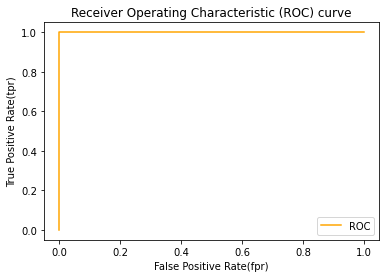

In [64]:
# plot perfect ROC and AUC score
fpr,tpr, thresholds=roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

##### 3. Confusion Matrix

In [65]:
from sklearn.metrics import confusion_matrix

y_preds=model.predict(x_test)
confusion_matrix(y_test, y_preds)

array([[21,  5],
       [ 8, 27]], dtype=int64)

In [66]:
len(y_preds), 16+4+6+35

(61, 61)

In [67]:
pd.crosstab(y_test, y_preds, 
           rownames=['Actual labels'],
           colnames=['Predicted labels']) 

Predicted labels,0,1
Actual labels,,
0,21,5
1,8,27


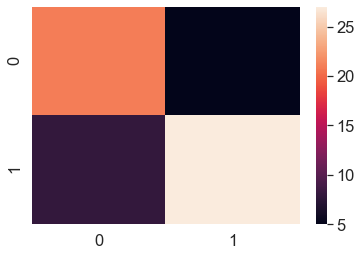

In [68]:
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# create a confusion matrix

conf_mat=confusion_matrix(y_test, y_preds)
# plot using seaborn
sns.heatmap(conf_mat);


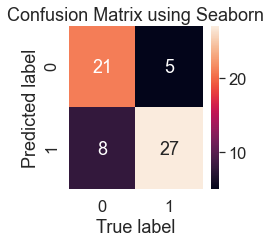

In [69]:
def plot_conf_mat(conf_mat):
    '''
    plot a confusion matrix using seaborn
    '''
    
    fig, ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat, 
                   annot=True, # Annotate the boxes with conf_mat info 
                   robust=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.title('Confusion Matrix using Seaborn')
plot_conf_mat(conf_mat)    


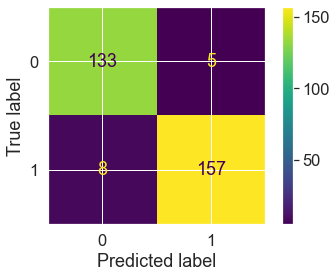

In [70]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x, y);

##### 4. Classification Report

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        26
           1       0.84      0.77      0.81        35

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [72]:
# Where precision and recall becomes valuable
disease_true=np.zeros(10000)
disease_true[0]=1 # only one predictive case
disease_preds=np.zeros(10000)# model predicts every case as 0
pd.DataFrame(classification_report(disease_true, 
                                   disease_preds,
                                  output_dict=True))

C:\Users\Raddy\desktop\ML\env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics
* ACCURACY is a good measure to start with if all classes are balance(eg. same amou t of samples which are labelled with 0 or 1)
* PRECISION AND RECALL become more important when the classes are inbalanced
* If false positive predictions are worst than false negative, aim for higher precision
* If false negative predictions are worse than false positive, aim for higher recall
* Fi-score is a combination of precision and recall

##### 4.2.2 Reggression model evaluation metrix

In this section, we will be looking at three topics
* 1. R^2 (pronouced r-square) or coefficient of determination
* 2. Mean absolute error (MAE)
* 3. Mean squared error (MSE)

##### 1. R^2

R^2 compares your model's predictions to the mean of the target. Values can be range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the target, it's R^2 value would be 0. And if your model perfectly predicts range of numbers it's R^2 value would be 1

In [73]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x=boston_df.drop('target',axis=1)
y=boston_df['target']

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test, y_test)

0.8654448653350507

In [79]:
from sklearn.metrics import r2_score
y_test_mean=np.full(len(y_test), y_test.mean())
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [78]:
y_test.mean()

21.488235294117644

In [81]:
r2_score(y_test, y_test_mean)

0.0

In [82]:
r2_score(y_test, y_test)

1.0

***2. Mean absolute error (MAE)***
MAE is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are

In [83]:
from sklearn.metrics import mean_absolute_error

y_preds=model.predict(x_test)
mae=mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [87]:
df=pd.DataFrame({'actual values':y_test,
               'predicted values':y_preds})
df['differences']= df['predicted values']-df['actual values']
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


***3. Mean squared error(MSE)***

MSE squared the differences between the predicted values and actual values and take the mean

In [89]:
from sklearn.metrics import mean_squared_error

y_preds=model.predict(x_test)
mse=mean_squared_error(y_test,y_preds)
mse

9.867437068627442

In [96]:
square=np.square(df['differences'])
square.mean()

9.867437068627442

##### 4.2.3 Finally using the scoring parameter

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart_disease.drop('target', axis=1)
y=heart_disease['target']
x_train, x_test,y_train, y_test=train_test_split(x, y, test_size=0.2)
model=RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test, y_test)

0.8524590163934426

In [102]:
np.random.seed(42)
cv_acc=cross_val_score(model, x, y)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [105]:
# Cross validation accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100 :.2f}%')

The cross-validated accuracy is: 82.48%


In [107]:
# Another way to calculate cross_validated accuracy

np.random.seed(42)
cv_acc=cross_val_score(model, x, y, scoring='accuracy')
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100 :.2f}%')

The cross-validated accuracy is: 82.48%


In [112]:
cv_precision=cross_val_score(model, x, y, scoring='precision')
np.mean(cv_precision)

0.8357542034012623

In [113]:
print(f'The precision accuracy is: {np.mean(cv_precision)*100: .2f}%')

The precision accuracy is:  83.58%


In [115]:
cv_recall=cross_val_score(model, x, y, scoring='recall')
np.mean(cv_recall)

0.8363636363636363

In [116]:
print(f'The recall accuracy is: {np.mean(cv_recall)*100: .2f}%')

The recall accuracy is:  83.64%


In [121]:
cv_f1=cross_val_score(model, x, y, scoring='f1')
np.mean(cv_f1)

0.8259518966438746

In [122]:
print(f'The F1-score accuracy is: {np.mean(cv_f1)*100: .2f}%')

The F1-score accuracy is:  82.60%


In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=boston_df.drop('target', axis=1)
y=boston_df['target']
x_train, x_test, y_train, y_test= train_test_split(x,y,
                                                  test_size=0.2)
model=RandomForestRegressor()


In [129]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, scoring=None)
np.mean(cv_r2)

0.6243870737930857

In [131]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, scoring='r2')
np.mean(cv_r2)

0.6243870737930857

In [134]:
# Mean absolute error (MAE)
mae=cross_val_score(model, x, y, scoring='neg_mean_absolute_error')
np.mean(mae)

-3.0021406911279356

In [136]:
# Mean squared error (MSE)
mse=cross_val_score(model, x, y, scoring ='neg_mean_squared_error')
np.mean(mse)

-22.773687860920194

### 4.3  Using different evaluation metrics as Scikit-Learn functions
****Classification evaluation functions****

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

np.random.seed(42)
x=heart_disease.drop('target', axis=1)
y=heart_disease['target']

x_train, x_test, y_train, y_test=train_test_split(x,y,
                                                 test_size=0.2)
model=RandomForestClassifier()
model.fit(x_train,y_train)

# make some predictions
y_preds=model.predict(x_test)

# evaluate the classifier
print('Classifier metrices on the test set')
print(f'Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test,y_preds)}')
print(f'F1: {f1_score(y_test,y_preds)}')

Classifier metrices on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615







***Regression classification functions*** 

In [143]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(42)
x=boston_df.drop('target', axis=1)
y=boston_df['target']

x_train,x_test, y_train,y_test=train_test_split(x, y,
                                               train_size=0.2)
model=RandomForestRegressor()
model.fit(x_train, y_train)

y_preds= model.predict(x_test)

print('Reggression metrics on test set')
print(f'r2 accuracy: {r2_score(y_test, y_preds)*100:.2f}%')
print(f'MAE accuracy: {mean_absolute_error(y_test, y_preds)}')
print(f'MSE accuracy: {mean_squared_error(y_test, y_preds)}')


Reggression metrics on test set
r2 accuracy: 77.95%
MAE accuracy: 2.980516049382717
MSE accuracy: 19.29764207160496


## 5. Improving ML model
First predictions is call baseline predictions
First model is called baseline model

From a data perspective:

*   could we collect more data? ( generally the more score, the better)
*   could we improve our data?

From model perspective:

*   Is there a better model we could use?
*   Could we improve the current model?
    
Hyperparameters vs parameters:

*    Parameters= model find these patterns in the data
*    Hyperparameters= setting on a model you can adjust to (potentially) improve it's ability to find pattern


There are 3 weays to adjust hyperparameters:
* 1. By hand
* 2. Randomly with RandomSearchCV
* 3. Exhaustively with GridSearchCV

    

In [144]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##### 5.1 Tunning hyperparameter by hand

Let's make sets, training, validation and test

We're going to try and adjust:
* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [159]:
def evaluate_preds(y_test, y_preds):
    '''
    Performs evaluation on y_test labels vs y_preds labels on a classification.
    '''
    accuracy=accuracy_score(y_test, y_preds)
    precision=precision_score(y_test, y_preds)
    recall=recall_score(y_test, y_preds)
    f1=f1_score(y_test, y_preds)
    metric_dict={'accuravcy':round(accuracy, 2), 
               'precision': round(precision, 2),
               'recall': round(recall, 2), 
               'f1': round(f1, 2)}
    print(f'ACCU: {accuracy *100:.2f}%')
    print(f'precission: {precision:.2f}')
    print(f'recall: {recall:.2f}')
    print(f'f1: {f1:.2f}')
    
    return metric_dict

In [160]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Shuffle the data
heart_disease_shuffled=heart_disease.sample(frac=1)

# split the data into x and y
x=heart_disease_shuffled.drop('target', axis=1)
y=heart_disease_shuffled['target']

# split the data into train, validation and test sets
train_split= round(0.7 * len(heart_disease_shuffled)) # 70% of the data
valid_split= round(train_split + 0.15 * len(heart_disease_shuffled))# 15% of the data
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]

model=RandomForestClassifier()
model.fit(x_train, y_train)

# make baseline predictions 
y_preds=model.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics=evaluate_preds(y_valid, y_preds)
baseline_metrics



ACCU: 82.22%
precission: 0.81
recall: 0.88
f1: 0.85


{'accuravcy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

#### 5.2 Hperparameter tuning with RandomizedSearchCV

In [164]:
from sklearn.model_selection import RandomizedSearchCV

grid={'n_estimators': [10, 100, 200, 500, 1000, 1200], 
    'max_depth': [None, 5, 10, 20, 30],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]}

np.random.seed(42)

# split the data into x and y
x=heart_disease_shuffled.drop('target', axis=1)
y=heart_disease_shuffled['target']

# split  the data into train and test sets
x_train, x_test, y_train, y_test=train_test_split(x, y, 
                                                 test_size=0.2)
model=RandomForestClassifier(n_jobs=1)

#Setup RamdomizedSearchCV
rs_model= RandomizedSearchCV(estimator=model,
                             param_distributions=grid,
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)
# fit the RandomizedSearchCV
rs_model.fit(x_train,y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.9s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.3s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.5s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   1.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   1.8s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   1.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   1.2s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   6.3s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.7min finished


In [166]:
rs_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [167]:
# make predictions with the best hyperparameters
rs_y_preds=rs_model.predict(x_test)

# Evaluate the prediction
rs_metrics=evaluate_preds(y_test, rs_y_preds)

ACCU: 81.97%
precission: 0.77
recall: 0.86
f1: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV


In [170]:
rs_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [194]:
from sklearn.model_selection import GridSearchCV, train_test_split
#from sklearn.ensemble import RandomForestClassifier
grid_2={'n_estimators': [100, 200, 500], 
    'max_depth': [None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [6],
    'min_samples_leaf': [1, 2]}

np.random.seed(42)

# split the data into x and y
x=heart_disease_shuffled.drop('target', axis=1)
y=heart_disease_shuffled['target']

# split  the data into train and test sets
x_train, x_test, y_train, y_test=train_test_split(x, y, 
                                                 test_size=0.2)
model=RandomForestClassifier(n_jobs=1)

#Setup GridSearchCV
gs_model=GridSearchCV(estimator=model,
                             param_grid=grid_2,
                            cv=5,
                            verbose=2)
# fit the GridSearchCV
gs_model.fit(x_train,y_train);


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   1.0s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   2.9s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   2.9s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   3.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   3.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   3.1s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.7min finished


In [195]:
# make predictions
gs_y_preds=gs_model.predict(x_test)

# evaluate the predictions
gs_metrics=evaluate_preds(y_test, gs_y_preds)


ACCU: 78.69%
precission: 0.74
recall: 0.82
f1: 0.78


*****Let's compare our different models metrics****

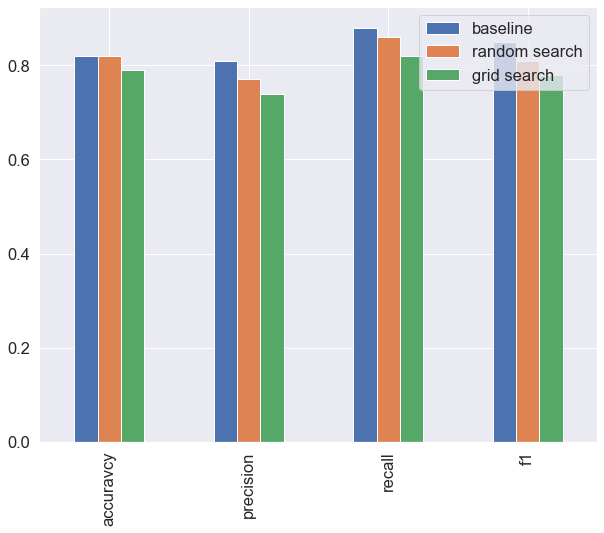

In [197]:
compare_metrics=pd.DataFrame({'baseline': baseline_metrics,
                             'random search':rs_metrics,
                             'grid search': gs_metrics})
compare_metrics.plot.bar(figsize=(10,8));

## 6. Saving and loading trained machine learning model

Two ways to save our ML trained models:

*   1. With Python's pickle module
*   2. With joblib module

***1. Pickle***

In [198]:
import pickle 

# Save an existing model to file
pickle.dump(gs_model, open('gs_random_forest_model_1.pkl', 'wb'))


In [199]:
# Load our saved model from file
loaded_pickle_model=pickle.load(open('gs_random_forest_model_1.pkl', 'rb'))

In [201]:
# make predictions 
pickle_y_preds=loaded_pickle_model.predict(x_test)
evaluate_preds(y_test, pickle_y_preds);

ACCU: 78.69%
precission: 0.74
recall: 0.82
f1: 0.78


**2. Joblib**

In [202]:
from joblib import dump, load

# save a model to file
dump(gs_model, filename='gs_random_forest_model_1.joblib')

['gs_random_forest_model_1.joblib']

In [203]:
# Load the save joblib ML model from file
loaded_joblib_model=load(filename='gs_random_forest_model_1.joblib')

In [205]:
# Make and evaluate joblib predictions
joblib_y_preds=loaded_joblib_model.predict(x_test)
evaluate_preds(y_test, joblib_y_preds);

ACCU: 78.69%
precission: 0.74
recall: 0.82
f1: 0.78


## 7. Puttingit all together!

In [206]:
data=pd.read_csv('data/car-sales-extended-missing-data.csv')
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [208]:
data.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64